In [95]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
from tqdm import tqdm
import matplotlib

In [41]:
dataset_path = '/vision/group/EPIC-KITCHENS/'
annotations_foldername = 'annotations'
annotations_folderpath = os.path.join(dataset_path, annotations_foldername)
visual_dataset_path = os.path.join(dataset_path, 'EPIC_KITCHENS_2018')
visual_images_foldername = 'object_detection_images'
visual_images_folderpath = os.path.join(visual_dataset_path, visual_images_foldername)

# training data
training_action_labels = 'EPIC_train_action_labels.csv'
training_object_labels = 'EPIC_train_object_labels.csv'
train_action_csvpath = os.path.join(annotations_folderpath, training_action_labels)
train_object_csvpath = os.path.join(annotations_folderpath, training_object_labels)

class_key = 'EPIC_noun_classes.csv'
class_key_csvpath = os.path.join(annotations_folderpath, class_key)

assert os.path.exists(train_action_csvpath), "{} does not exist".format(train_action_csvpath)
assert os.path.exists(train_object_csvpath), "{} does not exist".format(train_object_csvpath)
assert os.path.exists(visual_images_folderpath), "{} does not exist".format(visual_images_folderpath)
assert os.path.exists(class_key_csvpath), "{} does not exist".format(class_key_csvpath)

In [42]:
action_df = pd.read_csv(train_action_csvpath)
object_df = pd.read_csv(train_object_csvpath)
class_key_df = pd.read_csv(class_key_csvpath)

In [44]:
class_key_df

,noun_id,class_key,nouns
0,0,Nothing,['Nothing']
1,1,pan,"['pan', 'pan:sauce', 'pan:frying', 'pan:cake',..."
2,2,pan:dust,"['pan:dust', 'dustpan']"
3,3,tap,"['tap', 'tap:water', 'nozzle', 'nozzle:coffee']"
4,4,plate,"['plate', 'plate:pasta', 'saucer', 'dish', 'pl..."
5,5,knife,"['knife', 'knife:mincing', 'knife:using', 'bla..."
6,6,bowl,"['bowl', 'bowl:salad', 'bowl:glass', 'bowl:sug..."
7,7,spoon,"['spoon', 'spoon:wooden', 'spoon:using', 'teas..."
8,8,cupboard,"['cupboard', 'cabinet', 'locker', 'flap', 'doo..."
9,9,drawer,"['drawer', 'drawer:dishwasher', 'drawer:freeze..."


In [46]:
class_key_dict = dict(zip(class_key_df.noun_id, class_key_df.class_key))
class_key_dict

{0: 'Nothing',
 1: 'pan',
 2: 'pan:dust',
 3: 'tap',
 4: 'plate',
 5: 'knife',
 6: 'bowl',
 7: 'spoon',
 8: 'cupboard',
 9: 'drawer',
 10: 'fridge',
 11: 'lid',
 12: 'hand',
 13: 'onion',
 14: 'onion:spring',
 15: 'pot',
 16: 'glass',
 17: 'water',
 18: 'fork',
 19: 'board:chopping',
 20: 'bag',
 21: 'sponge',
 22: 'spatula',
 23: 'cup',
 24: 'oil',
 25: 'bin',
 26: 'meat',
 27: 'potato',
 28: 'bottle',
 29: 'container',
 30: 'tomato',
 31: 'salt',
 32: 'cloth',
 33: 'sink',
 34: 'door:kitchen',
 35: 'pasta',
 36: 'dish:soap',
 37: 'food',
 38: 'kettle',
 39: 'box',
 40: 'carrot',
 41: 'sauce',
 42: 'colander',
 43: 'milk',
 44: 'rice',
 45: 'garlic',
 46: 'pepper',
 47: 'hob',
 48: 'dough',
 49: 'dishwasher',
 50: 'egg',
 51: 'cheese',
 52: 'bread',
 53: 'table',
 54: 'salad',
 55: 'microwave',
 56: 'oven',
 57: 'cooker:slow',
 58: 'coffee',
 59: 'filter',
 60: 'jar',
 61: 'rack:drying',
 62: 'chicken',
 63: 'tray',
 64: 'mixture',
 65: 'towel',
 66: 'towel:kitchen',
 67: 'peach',
 68

In [25]:
object_df

,noun_class,noun,participant_id,video_id,frame,bounding_boxes
0,20,bag,P01,P01_01,56581,"[(76, 1260, 462, 186)]"
1,20,bag,P01,P01_01,56611,"[(84, 1190, 446, 204)]"
2,20,bag,P01,P01_01,56641,"[(584, 936, 358, 268)]"
3,20,bag,P01,P01_01,56671,"[(472, 836, 412, 342)]"
4,20,bag,P01,P01_01,56701,"[(492, 862, 392, 364)]"
5,20,bag,P01,P01_01,56731,"[(460, 930, 352, 292)]"
6,20,bag,P01,P01_01,56761,"[(410, 870, 412, 380)]"
7,20,bag,P01,P01_01,56791,"[(416, 864, 426, 396)]"
8,20,bag,P01,P01_01,56821,"[(334, 950, 466, 310)]"
9,20,bag,P01,P01_01,56851,"[(448, 878, 344, 416)]"


In [32]:
class_framefreq = []
for element in tqdm(list(set(object_df['noun_class']))):
    class_framefreq.append((element, len(object_df.loc[(object_df['noun_class']==element)\
                                                      &(object_df['bounding_boxes']!='[]')])))

Text(0.5, 1.0, 'top 50 classes by number of labeled frames')

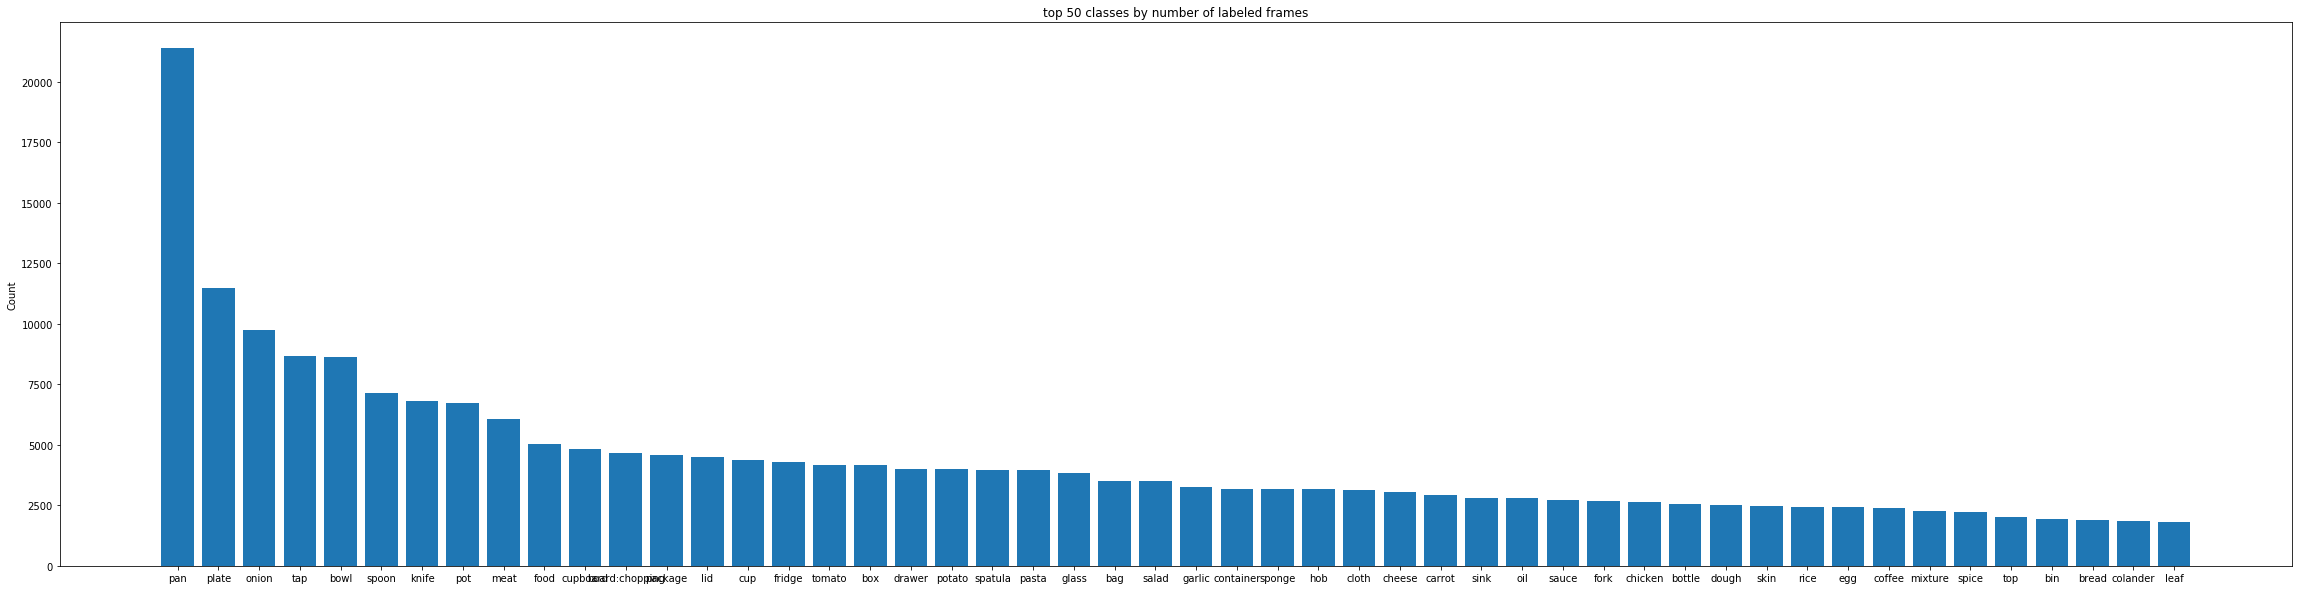

In [64]:
top_k = 50
sorted_class_framefreq = sorted(class_framefreq, key=lambda x: x[1], reverse=True)
plt.figure(figsize=(top_k/10*8, 10))
plt.bar([class_key_dict[element[0]] for element in sorted_class_framefreq[:top_k]],
       [element[1] for element in sorted_class_framefreq[:top_k]])
plt.ylabel('Count')
plt.title('top {} classes by number of labeled frames'.format(top_k))

In [27]:
len(set(object_df['noun_class']))

295

In [28]:
len(set(object_df['noun']))

800

In [17]:
len(class_framefreq)

1047

## Co-occurence matrix

In [72]:
individual_ranked_classes = [element[0] for element in sorted_class_framefreq]
print(individual_ranked_classes)

[1, 4, 13, 3, 6, 7, 5, 15, 26, 37, 8, 19, 77, 11, 23, 10, 30, 39, 9, 27, 22, 35, 16, 20, 54, 45, 29, 21, 47, 32, 51, 40, 33, 24, 41, 18, 62, 28, 48, 68, 44, 50, 58, 64, 79, 78, 25, 52, 42, 72, 46, 31, 80, 84, 95, 56, 73, 100, 38, 43, 49, 63, 126, 61, 90, 55, 110, 93, 108, 119, 59, 133, 70, 114, 99, 207, 69, 83, 75, 60, 105, 53, 130, 161, 94, 67, 128, 101, 122, 14, 145, 76, 143, 65, 86, 81, 117, 138, 111, 136, 71, 104, 109, 123, 97, 186, 82, 190, 102, 185, 146, 140, 167, 166, 121, 103, 96, 87, 210, 132, 159, 66, 129, 158, 195, 116, 168, 17, 88, 134, 237, 85, 177, 162, 125, 112, 178, 118, 147, 120, 276, 239, 150, 127, 144, 229, 148, 131, 137, 141, 249, 98, 173, 92, 204, 174, 139, 240, 223, 155, 182, 277, 196, 91, 153, 199, 135, 318, 142, 193, 256, 184, 181, 263, 209, 191, 206, 163, 299, 272, 234, 211, 254, 156, 198, 214, 194, 320, 241, 208, 322, 188, 242, 251, 165, 231, 236, 74, 197, 314, 164, 252, 176, 268, 284, 213, 238, 255, 189, 278, 232, 246, 253, 154, 106, 310, 107, 192, 172, 328, 

In [119]:
counts = {}
for idx, class_1 in enumerate(individual_ranked_classes[:20]):
    for class_2 in individual_ranked_classes[idx+1:20]: 
        print(class_1, class_2)
        # find out co_occurence of two classes
        subsetOI = object_df.loc[(object_df['noun_class'] == class_1)\
                                 | (object_df['noun_class'] == class_2)]
        sorted_subsetOI = subsetOI.sort_values(by=['frame'])
        
        frames_classes = {}
        for index, row in sorted_subsetOI.iterrows():
            if row['frame'] not in frames_classes:
                frames_classes[row['frame']] = set([row['noun_class']])
            else:
                if row['noun_class'] not in frames_classes[row['frame']]:
                    frames_classes[row['frame']].add(row['noun_class'])
        count = 0
        for element in frames_classes:
            if len(frames_classes[element]) == 2:
                count +=1
        counts[(class_1, class_2)] = count

1 4
1 13
1 3
1 6
1 7
1 5
1 15
1 26
1 37
1 8
1 19
1 77
1 11
1 23
1 10
1 30
1 39
1 9
1 27
4 13
4 3
4 6
4 7
4 5
4 15
4 26
4 37
4 8
4 19
4 77
4 11
4 23
4 10
4 30
4 39
4 9
4 27
13 3
13 6
13 7
13 5
13 15
13 26
13 37
13 8
13 19
13 77
13 11
13 23
13 10
13 30
13 39
13 9
13 27
3 6
3 7
3 5
3 15
3 26
3 37
3 8
3 19
3 77
3 11
3 23
3 10
3 30
3 39
3 9
3 27
6 7
6 5
6 15
6 26
6 37
6 8
6 19
6 77
6 11
6 23
6 10
6 30
6 39
6 9
6 27
7 5
7 15
7 26
7 37
7 8
7 19
7 77
7 11
7 23
7 10
7 30
7 39
7 9
7 27
5 15
5 26
5 37
5 8
5 19
5 77
5 11
5 23
5 10
5 30
5 39
5 9
5 27
15 26
15 37
15 8
15 19
15 77
15 11
15 23
15 10
15 30
15 39
15 9
15 27
26 37
26 8
26 19
26 77
26 11
26 23
26 10
26 30
26 39
26 9
26 27
37 8
37 19
37 77
37 11
37 23
37 10
37 30
37 39
37 9
37 27
8 19
8 77
8 11
8 23
8 10
8 30
8 39
8 9
8 27
19 77
19 11
19 23
19 10
19 30
19 39
19 9
19 27
77 11
77 23
77 10
77 30
77 39
77 9
77 27
11 23
11 10
11 30
11 39
11 9
11 27
23 10
23 30
23 39
23 9
23 27
10 30
10 39
10 9
10 27
30 39
30 9
30 27
39 9
39 27
9 27


Text(0.5, 1.05, 'Cooccurrence matrix of top 10 most individually freqently occuring classes ')

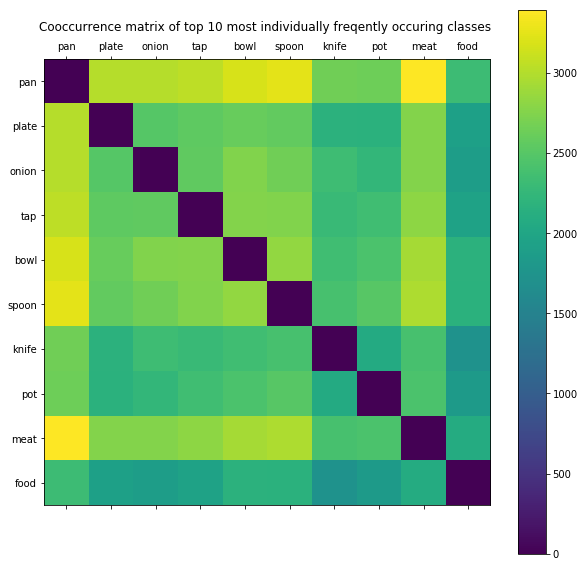

In [121]:
count_matrix = []
for i in range(10):
    row = []
    for j in range(10):
        if individual_ranked_classes[i] == individual_ranked_classes[j]:
            row.append(0)
        elif (individual_ranked_classes[i],individual_ranked_classes[j]) in counts: 
            row.append(counts[(individual_ranked_classes[i],individual_ranked_classes[j])])
        elif (individual_ranked_classes[j],individual_ranked_classes[i]) in counts:
            row.append(counts[(individual_ranked_classes[j],individual_ranked_classes[i])])
        else:
            raise ValueError('missing value')
    count_matrix.append(row)

count_matrix = np.array(count_matrix)

alpha = [class_key_dict[element] for element in individual_ranked_classes[:10]]

fig = plt.figure(figsize=(10,10))
ax.axis('image')
ax = fig.add_subplot(111)
cax = ax.matshow(count_matrix, interpolation='nearest')
fig.colorbar(cax)
ax.set_xticks(np.arange(10))
ax.set_xticklabels(alpha)
ax.set_yticks(np.arange(10))
ax.set_yticklabels(alpha)
ax.set_title('Cooccurrence matrix of top 10 most individually freqently occuring classes ')
# ax.set_xticklabels(alpha)
# ax.set_yticklabels(alpha)


In [104]:
matplotlib.numpy.arange(len(alpha))

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])